---

# <center>★ AI / ML Research Implementation - VGG 16 ★

<center><img src="https://raw.githubusercontent.com/Masterx-AI/VGG-16_Implemenation/main/VGG16.png" style="width: 600px;"/>

---

### Objective:
- Understand the Model Architecture
- Reconstruct the Model Architecture from scratch
- Perform a dry run test to assess it's implemenation on real-time data.

---

### IVGG 16 Model Description:




---

## <center> Stractegic Plan of Action:
    
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Dataset Prepration
2. Model Development
3. Model Testing
4. Project Outcomes & Conclusion

---

## <center> 1. Dataset Prepration

In [1]:
#Importing the basic librarires

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten

# Preparing the dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Preparing the dataset
validation_images, validation_labels = train_images[:5000], train_labels[:5000]
train_images, train_labels = train_images[5000:], train_labels[5000:]

# Building tensorflow datasets
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

170508288/170498071 [==============================] - 2s 0us/step


2022-06-26 15:34:27.702963: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [2]:
def process_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 274x274
    image = tf.image.resize(image, (224,224))
    return image, label

train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
validation_ds_size = tf.data.experimental.cardinality(validation_ds).numpy()

train_ds = (train_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
test_ds = (test_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))
validation_ds = (validation_ds
                  .map(process_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

---

## <center>2. Model Development

In [3]:
# Building the Incpetion V1 Model Architecture

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu', name='fc1'))
model.add(Dense(128, activation='relu', name='fc2'))
model.add(Dense(1, activation='sigmoid', name='output'))

# Compiling the Model
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Checking Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

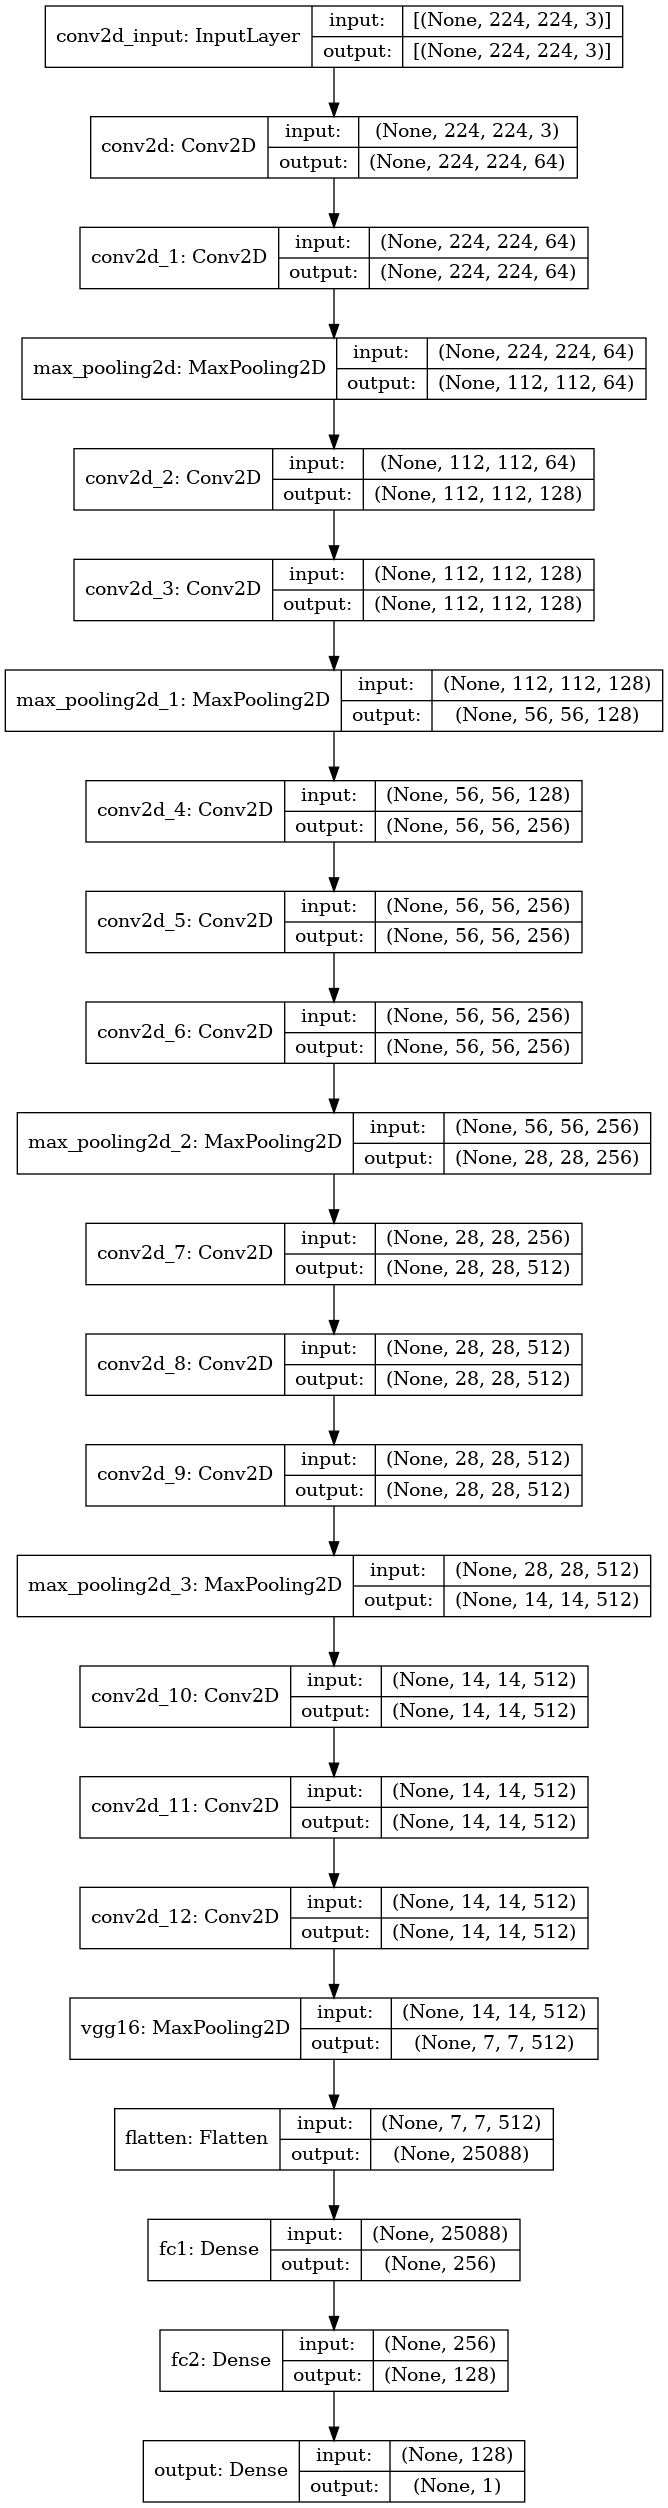

In [4]:
# Plotting the model architecture

plot_model(model, to_file="my_model.png", show_shapes=True)

---

## <center>3. Model Testing

In [5]:
# Moddel Training

# hisroty = model.fit(train_ds,
#                     epochs=5,
#                     validation_data=validation_ds,
#                     validation_freq=1)

### COMMENTING THE TRAINING CODE AS IT THROWS MEMORY ALLOCATION ERROR

In [6]:
# Model Evaluation

# model.evaluate(test_x, test_y)

---

# <center>4. Project Outcomes & Conclusion

### Here are some of the key outcomes of the project:

- The Model Architecture was reconstructed from scratch with no errors.
- We were able to plot the model graph & observe input & output shapes of all the layers. 
- Also we could identify that the total trainable paramters for the VGG 16 model were 21.2M.
- To demonstrate it's functionality, we have tested the model for just 5 epochs (due to hardware limitations). 
- Despite this, the model has performed surpisingly well achieving high accuracy within few iterations.

In [7]:
#<<<--------------------------------------THE END---------------------------------------->>>